CS7317 Using Machine Learning Tools 2020, Assignment 2: Breast Cancer Classification

This is the template for the submission of Assignment 2. Keep the numbering, headings and sequence intact. Add the code and text answers (Markdown cells) below the respective numbered heading.

Student name: Ameya Rajesh Sonkusale

Student ID: a1785144

Initialise environment, libraries, settings, etc.:

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.svm import SVC

Load the data set:

In [2]:
# code here
data = load_breast_cancer()

1	Understand the dataset (15%)

1.1	Question: Briefly describe what each of the 10 parameters of the cell nuclei mean, using the documentation of the dataset and the example image in Figure 1. What could be the reasons for using the mean, standard error and maximum of each of the 10 parameters?

Answer: The 10 parameters of the nuclei mean are described below:

1. radius: It is the mean of distances from center to points on the perimeter of the cell nuclei.

2. texture: It is the standard deviation of gray-scale values of the nuclei.

3. perimeter: It is the total perimeter of cell nuclei. 

4. area: It is the total area of Cell nuclei

5. smoothness: It is the local variation in radius lengths of the cell  nuclei.

6. compactness: perimeter^2 / area - 1.0

7. concavity: It is the severity of concave portions of the contour of the cell nuclei.

8. concave points: It is the number of concave portions of the contour of the cell nucei.

9. symmetry: It is the mean symmetry of cell nuclei.

10. fractal dimension: "coastline approximation" - 1


The reason for using the mean, standard error and maximum of each of the 10 parameters is because are are the very basic parameters which covers a wide statistical range. A cell have irregular shape and there is always a possibility of error while measuring different paramets. Thats why the three diifferent aspects of data are taken which include mean, standard error and worst case.

1.2	Plot histograms of each of the 30 features, using two distributions, one for each class, in each diagram. Use 3 figures with 10 subplots each.

convert data to pandas dataframe

In [3]:
X = data["data"]
y = data["target"]
feature_names = data["feature_names"]
target = data['target'];
df = pd.DataFrame(data=X, columns=feature_names);
df.insert(30,"Class",target);
df['Class'] = df['Class'].map({
    0: 'Malignant',
    1: 'Benign',
});

In [4]:
def plothist(data,start,end):
    
    columns = list(data.columns[start:end])

    plt.figure(figsize=(10,10))
    for i, feature in enumerate(columns):
        rows = int(len(columns)/2)

        plt.subplot(rows, 2, i+1)

        sns.distplot(data[data['Class']=='Malignant'][feature], bins=12, color='red', label='Malignant');
        sns.distplot(data[data['Class']=='Benign'][feature], bins=12, color='blue', label='Benign');

        plt.legend(loc='upper right')

    plt.tight_layout()
    
    plt.show()
#END

Mean of fetures

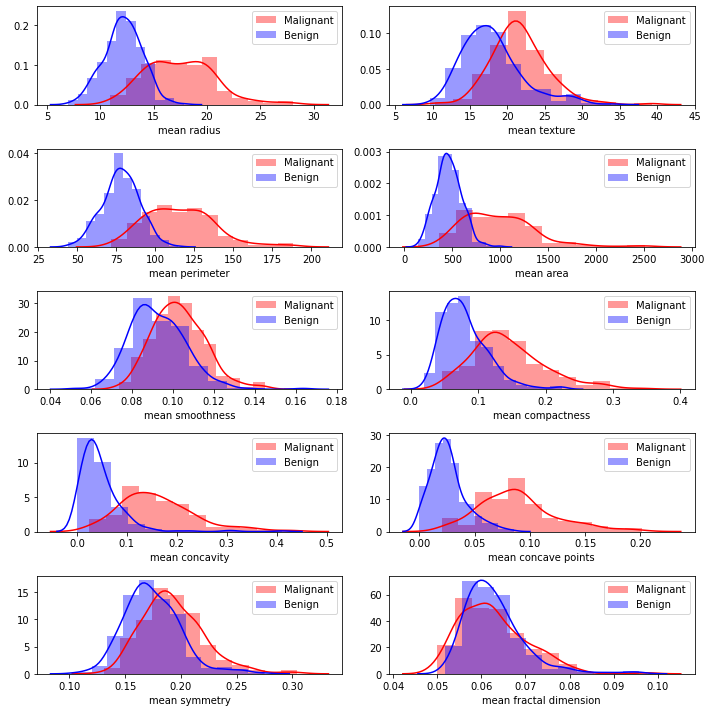

In [5]:
plothist(df,0,10);

Standard error of features

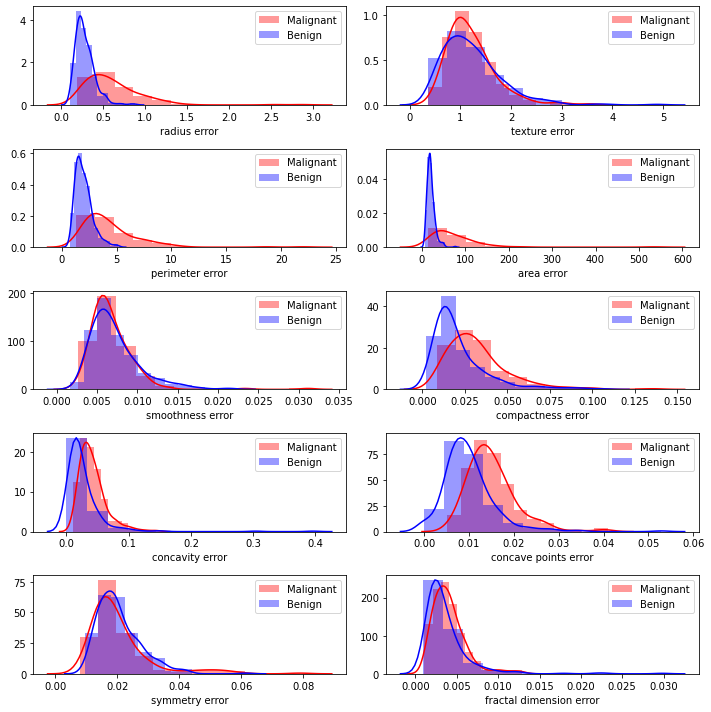

In [6]:
plothist(df,10,20);

Maxiumum of features

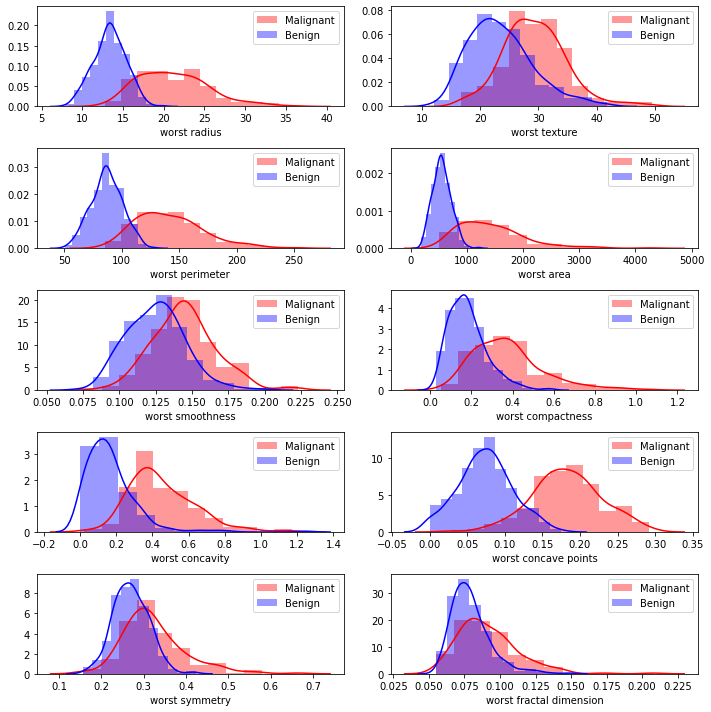

In [7]:
plothist(df,20,30);

Answer: We used seaborn library of python to plot histograms of each feature for two classes i.e. Malignant and Benign.

1.3	Plot receiver-operating-characteristic (ROC) curves of the individual features into 3 figures, one figure for each of the groups of 10.

In [8]:
def plotROC(data,start,end):
    
    columns = list(data.columns[start:end])

    plt.figure(figsize=(10,10))
    for i, feature in enumerate(columns):
        rows = int(len(columns)/2)
        fpr, tpr, thresholds = metrics.roc_curve(target, df[feature])

        plt.subplot(rows, 2, i+1)

        plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
        plt.plot([0, 1], [0, 1], color='skyblue', lw=2, linestyle='--')
        
        plt.title(feature)

        plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()
#END

Mean of features

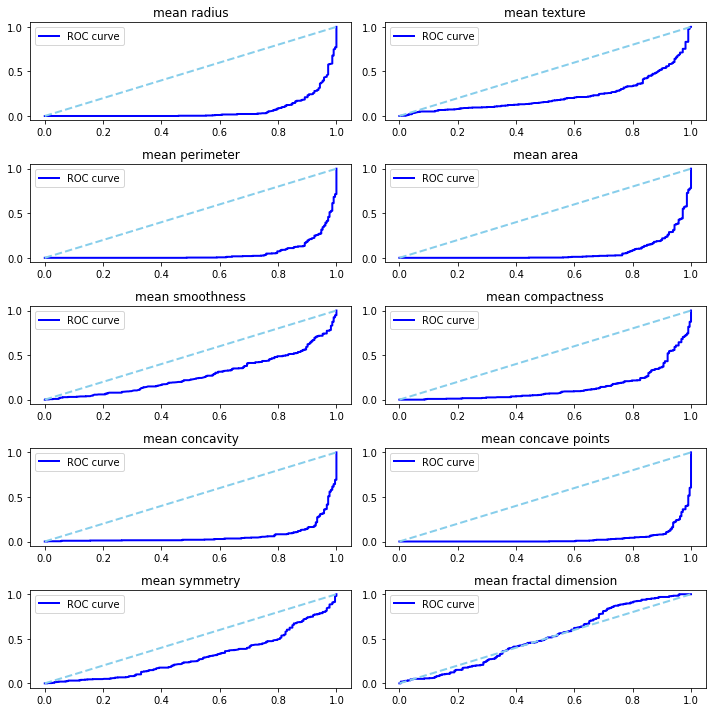

In [9]:
plotROC(df,0,10);

Standard error of features

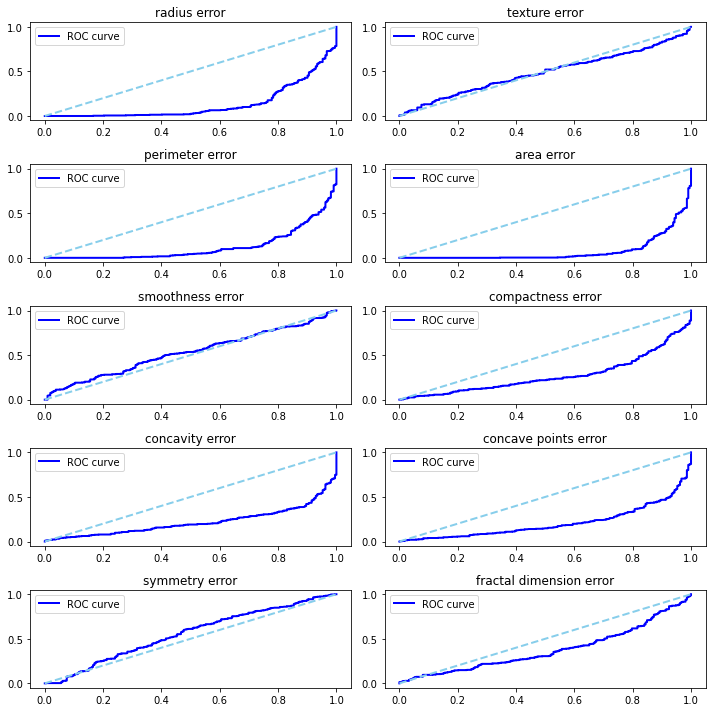

In [10]:
plotROC(df,10,20);

Maxiumum of features

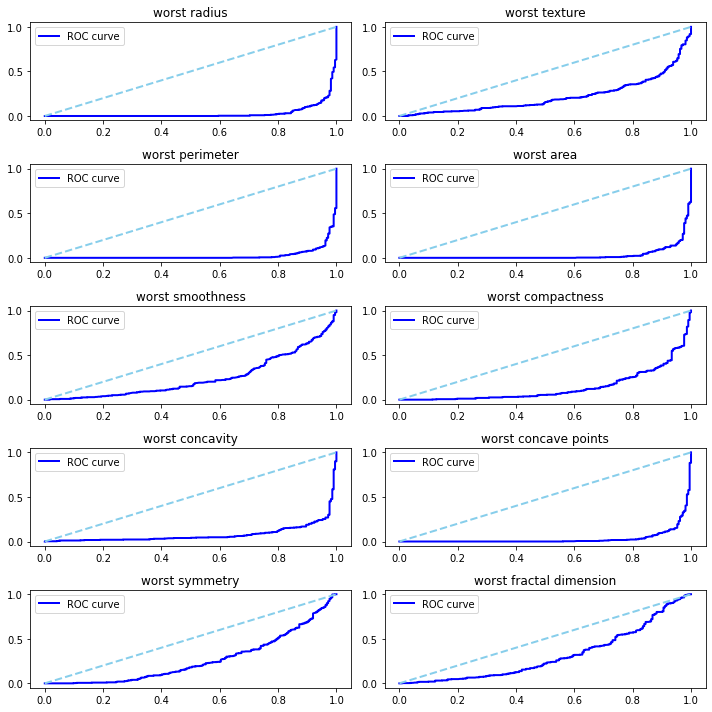

In [11]:
plotROC(df,20,30);

1.4	Question: Which of the parameters seems promising based on the histograms and ROC curves? Justify your choice while referring to the particular features in the figures that indicate a good separation. Choose your top five candidate features.

Answer: The following paramets seems promising and indicates a good seperation:
1. radius: radius parameter indicates a large seperation both in histogram and roc curves. the difference can be clearly seen in histogram. The curve line is away from linear line which indicates seperation between curves.

2. texture: texture parameter indicates a large seperation both in histogram and roc curves. the difference can be clearly seen in histogram. The curve line is away from linear line which indicates seperation between curves.

3. perimeter: parimeter indicates a large seperation both in histogram and roc curves. the difference can be clearly seen in histogram. The curve line is away from linear line which indicates seperation between curves.

4. concavity: concavity parameter indicates a large seperation both in histogram and roc curves. the difference can be clearly seen in histogram. The curve line is away from linear line which indicates seperation between curves.

5. concave points: concave points indicates a large seperation both in histogram and roc curves. the difference can be clearly seen in histogram. The curve line is away from linear line which indicates seperation between curves.

1.5	Analysis Point: Calculate the mean of all instances of the malignant class (centre of mass in high dimensional feature space) and the mean of all instances of the benign class. Save the mean between those two as the “Analysis Point”. It is a point in the feature space that is approximately between both classes.

In [12]:
df1 = df[df['Class'] == 'Malignant' ].mean()
df2 = df[df['Class'] == 'Benign' ].mean()
analysis_point = (df1 + df2)/2
analysis_point

mean radius                 14.804677
mean texture                19.759834
mean perimeter              96.720392
mean area                  720.583306
mean smoothness              0.097688
mean compactness             0.112636
mean concavity               0.103416
mean concave points          0.056854
mean symmetry                0.183547
mean fractal dimension       0.062774
radius error                 0.446582
texture error                1.215647
perimeter error              3.162125
area error                  46.903777
smoothness error             0.006988
compactness error            0.026860
concavity error              0.033910
concave points error         0.012459
symmetry error               0.020528
fractal dimension error      0.003849
worst radius                17.257306
worst texture               26.416639
worst perimeter            114.188134
worst area                 990.592880
worst smoothness             0.134902
worst compactness            0.278748
worst concav

2	Train a decision tree classifier (15%)

2.1	Construct a decision tree classifier using the gini criterion and random_state=0. Below, you will perform a hyper parameter search of max_depth and min_samples_leaf. Check the following remaining parameters of the classifier and either keep the default value or select a different value: min_samples_split, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease, min_impurity_split and class_weight. Question: Describe each choice briefly in one sentence.

In [13]:
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=2, random_state=0)

Answer: Each choice is described as below:

max_depth = 5: max_depth is the maximum depth of the decisioin tree. We have assumed this value to be 5.

min_samples_leaf = 2: min_samples_leaf is the minimum number of leafs in the decisioin tree. We have assumed this value to be 2.

Rest all are taken with default values.

2.2	Build a pipeline including any pre-processing steps that you think are necessary. Question: Do the data need to be scaled for decision tree classification? Are the different class sizes a problem, and if so what are you doing about it?

In [14]:
df['Class'] = LabelEncoder().fit_transform(df['Class'])

pipeline = Pipeline([
    ('normalizer', StandardScaler()), 
    ('clf', dt_classifier )
])

Answer: Yes we need to scale the data for decision tree classification due the difference in number of instances of different classes. we have used Standared Scaler for this problem.

2.3	Perform a grid search using five-fold cross validation over values of the maximum depth (max_depth) and the minimum number of samples per leaf (min_samples_leaf). Choose the value range yourself. Question: What is the rationale for your choice?

In [15]:
X = df.iloc[:,:30]
Y = df.Class

parameters = {'clf__max_depth':range(1,20), 'clf__min_samples_leaf':range(1,20)}
cv_grid = GridSearchCV(pipeline, parameters, cv=5)

cv_grid.fit(X, Y)

tree_model = cv_grid.best_estimator_
print (cv_grid.best_score_, cv_grid.best_params_) 

0.9384722869119703 {'clf__max_depth': 4, 'clf__min_samples_leaf': 8}


Answer: We have used range for both from 1 to 20. After the search the best value for max_depth is 4 and for min_samples_leaf is 8.

3	Evaluate the decision tree classifier (20%)

3.1	Calculate the confusion matrix, precision and recall of the final classifier. Question:  Based on these metrics, what is the chance of failing to detect a sample with cancer? What are the strengths and weaknesses of the classifier?

In [16]:
X = df.iloc[:,:30]
Y = df.Class

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)


dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=8, random_state=0)
dt_classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = dt_classifier.predict(x_test)

cm = confusion_matrix(y_pred, y_test)


print('Confution Metrix\n'+str(cm))
print('Precision: {:.4f}'.format(cm[0][0]/(cm[0][0] + cm[0][1])))
print('Recall: {:.4f}'.format(cm[0][0]/(cm[0][0] + cm[1][0])))

Confution Metrix
[[100   2]
 [  8  61]]
Precision: 0.9804
Recall: 0.9259


Answer:Chances of failing to detect a sample with cancer are: 16\(92+58+16+5) i.e. 9.36 percent.

This classifier has low precision and high recall value which means this classifier can accurately predict most of the non cancer cases but is failed to predict most of the cancer cases.

3.2	Display decision tree using plot_tree(). Question: Describe the structure. What do each of the entries in the first node mean? Are the features in the decision tree matching the initial candidate features from Section 1?

[Text(651.0, 489.24, 'X[27] <= 0.142\ngini = 0.468\nsamples = 398\nvalue = [249, 149]'),
 Text(465.0, 380.52000000000004, 'X[23] <= 952.9\ngini = 0.147\nsamples = 263\nvalue = [242, 21]'),
 Text(372.0, 271.8, 'X[13] <= 35.26\ngini = 0.077\nsamples = 250\nvalue = [240, 10]'),
 Text(186.0, 163.08000000000004, 'X[27] <= 0.134\ngini = 0.034\nsamples = 232\nvalue = [228, 4]'),
 Text(93.0, 54.360000000000014, 'gini = 0.018\nsamples = 224\nvalue = [222, 2]'),
 Text(279.0, 54.360000000000014, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(558.0, 163.08000000000004, 'X[19] <= 0.004\ngini = 0.444\nsamples = 18\nvalue = [12, 6]'),
 Text(465.0, 54.360000000000014, 'gini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(651.0, 54.360000000000014, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(558.0, 271.8, 'gini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(837.0, 380.52000000000004, 'X[13] <= 21.945\ngini = 0.098\nsamples = 135\nvalue = [7, 128]'),
 Text(744.0, 271.8, 'gini = 0.486\nsamples =

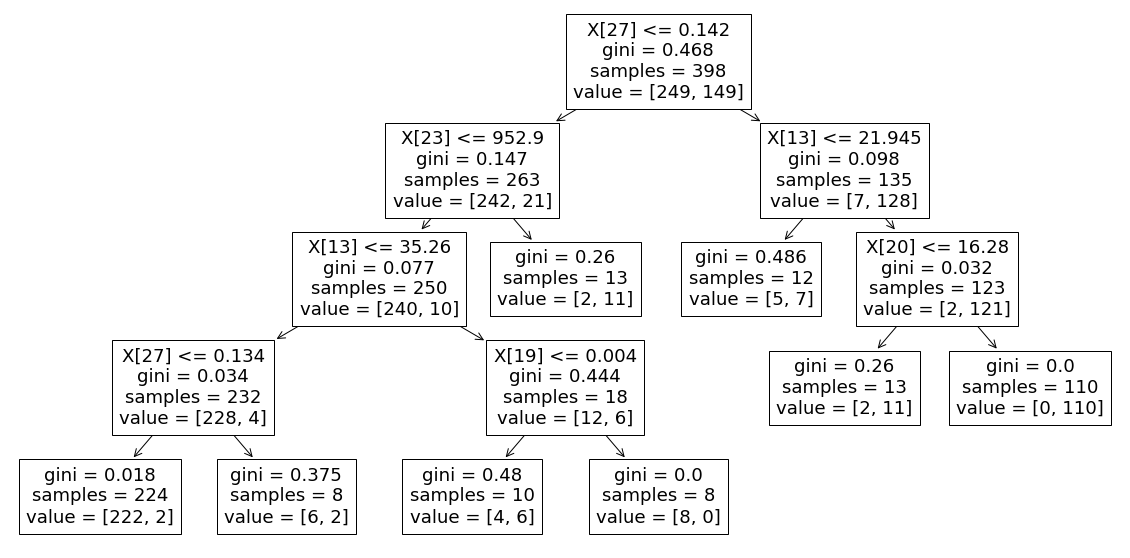

In [17]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier)

Answer:There are 5 levels in the decision tree which contains 21 nodes. Each node checks a particular feature and classify the data based on it.

The entries in the first node means that 28 feature column i.e. worst symmetry is compared to a value and based on it 398 instances of data are classified.

Not all initial candidate featuires aree matching correctly like mean radius but most of the features are same as candidate features.

3.3	Display the decision boundaries (use function predict()) together with a scatter plot of the data using two features at a time. 

Important feature columns

In [18]:
dt_classifier.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0422268 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01974451,
       0.00339571, 0.        , 0.        , 0.09910372, 0.        ,
       0.        , 0.        , 0.83552926, 0.        , 0.        ])

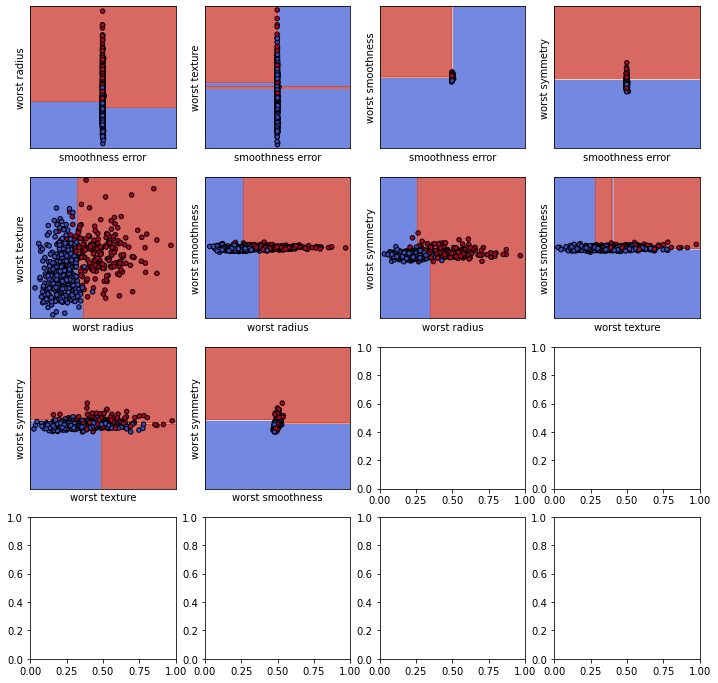

In [19]:
def make_meshgrid(x, y, h=.02):
    
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plotdb(clf):
    fig, sub = plt.subplots(4, 4,figsize=(12,12))
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    list2 = [14,20,21,24,28]

    count=0
    for a in list2:
        for b in list2:

            if a<b:

                ax = sub.flatten()[count];

                X = df[[feature_names[a],feature_names[b]]].to_numpy()
                y = df.Class

                clf.fit(X,y)
                X0, X1 = X[:, 0], X[:, 1]
                xx, yy = make_meshgrid(X0, X1)

                plot_contours(ax, dt_classifier, xx, yy,
                              cmap=plt.cm.coolwarm, alpha=0.8)
                ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
                ax.set_xlim(xx.min(), xx.max())
                ax.set_ylim(yy.min(), yy.max())
                ax.set_xlabel(feature_names[a])
                ax.set_ylabel(feature_names[b])
                ax.set_xticks(())
                ax.set_yticks(())

                count = count + 1

    plt.show()
#END

plotdb(dt_classifier)

3.4	Question: Is the class differentiation well characterised by the node thresholds or is it modelling the boundary using a rigid or stair case pattern? Why are there few 2D scatterplots with only one class shown as prediction contour?

Answer: Yes the class differentiation is well characterised in many of the plots. However thjere are plots which does not clearly differentiate both classes. There is no plot with only one class shown as prediction contour because these can seperately classify each class.

4	Train a support vector classifier with RBF kernel (15%)

4.1	Construct a support vector classifier with a radial basis function kernel. Below, you will perform a hyper parameter search of C and gamma. Check the following remaining parameters of the classifier and either keep the default value or select a different value: tol, class_weight and max_iter. Question: Describe each choice briefly in one sentence.

In [20]:
svm_classifier = SVC(C=1.0, kernel='rbf', gamma='scale');

Answer: Each choice is described as below:

C = 1.0: We have assumed this value as 1.0 (default value).

gamma = 'scale': We have assumed this value as 'scale' (default value).

Rest all are taken with default values.

4.2	Build a pipeline including any pre-processing steps that you think are necessary. Question: Do the data need to be scaled for support vector classification? Are the different class sizes a problem, and if so what are you doing about it?

In [21]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), 
    ('clf', svm_classifier )
])

Answer: Yes we need to scale the data for decision tree classification due the diffrence in number of instances of different classes. we have used Standared Scaler for this problem.

4.3	Perform a grid search using five-fold cross validation over values of the regularisation parameter C and the kernel coefficient gamma. Choose the value ranges yourself. Question: What is the rationale for your choice?

In [22]:
X = df.iloc[:,:30]
Y = df.Class

parameters = {'clf__C' : np.linspace(0.1,1.2,12), 'clf__gamma' :['scale','auto',0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2] }

cv_grid = GridSearchCV(pipeline, parameters, cv=5)

cv_grid.fit(X, Y)

tree_model = cv_grid.best_estimator_
print (cv_grid.best_score_, cv_grid.best_params_) 

0.9753920198726906 {'clf__C': 1.0999999999999999, 'clf__gamma': 'scale'}


Answer: We have choosenC range from 0.1 to 1.2 and gamma range from 0.1 to 1.2 with scale and auto option.

5	Evaluate the support vector classifier (20%)

5.1	Calculate the confusion matrix, precision and recall of the final classifier. Question: Based on these metrics, what is the chance of failing to detect a sample with cancer? What are the strengths and weaknesses of this classifier?

In [23]:
X = df.iloc[:,:30]
Y = df.Class

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)


svm_classifier = SVC(C=1.1, kernel='rbf', gamma='scale');
svm_classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = svm_classifier.predict(x_test)

cm = confusion_matrix(y_pred, y_test)


print('Confution Metrix\n'+str(cm))
print('Precision: {:.4f}'.format(cm[0][0]/(cm[0][0] + cm[0][1])))
print('Recall: {:.4f}'.format(cm[0][0]/(cm[0][0] + cm[1][0])))

Confution Metrix
[[107  11]
 [  1  52]]
Precision: 0.9068
Recall: 0.9907


Answer:Chances of failing to detect a sample with cancer are: 8\(100+2+8+61) i.e. 4.7 percent.

This classifier has high precision and high recall value which means this classifier can accurately predicidt most of the non cancer cases and have the power to not to fail in predicting cancer patients.

5.2	Display the decision boundary (use function decision_function()) together with a scatter plot of the data using the same features and figure layout as in the decision tree display for direct comparability. This time, use a suitable colormap (parameter “cmap”) in the contourf() function. Mark the support vectors. 

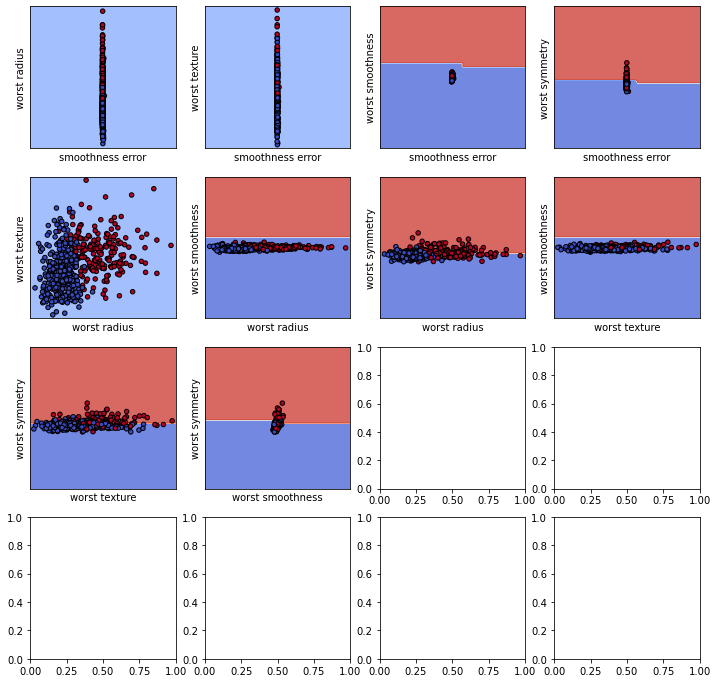

In [24]:
plotdb(svm_classifier)

5.3	Question: What is the meaning of the support vectors? Where can we see their purpose in the diagrams?

Answer: Support vectors is the area between the two classes. In the diagram, Support vects divide the two classes into two different planes.

6	Compare the classifiers and interpret (15%)

6.1	Question: Compare the classifier structures and decision boundaries of both classifiers. Point out similarities and differences. How do the classifiers compare outside the areas of dense sampling in the parameter space, e.g. towards the edges of the scatterplot (extrapolation)?

Answer: SVM classifier is better in classifying the data into two seperate classes. Both the classifier have the same candidate features. But SVM classifier is more accurate than Decision tree classifier. However outside the dense sampling area decision tree classifier performs better.

6.2	Question: Generalisability: Do you see sources of bias in the two classifiers? Are the models showing any signs of overfitting (variance error)?

Answer: Yes we saw sources of bias in two classifier. There are various signs of variance errors in the decision tree classifier plots. But In SVM, only 2 diagram have visible variance error. 

6.3	Question: Table 1 from Street et al. (1993) below shows the accuracies of their classifiers for different numbers of features and different numbers of hyperplanes used. Compare the number of features (decision tree), selection of features and accuracy of your classifiers with this table. Is there only one good set of features, many different sets or is there a pattern of similar feature combinations?

Answer: In our result, the pair of features are different than the table shown. In our result there are two sets of features that shows best accuracy i.e. worst radius and worst texture, worst radius and worst symmetry.